# 1. 神经网络的底层搭建

## 1.1 导入包

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#ipython很好用，但是如果在ipython里已经import过的模块修改后需要重新reload就需要这样
#在执行用户代码前，重新装入软件的扩展和模块。
%load_ext autoreload   
#autoreload 2：装入所有 %aimport 不包含的模块。
%autoreload 2          

np.random.seed(1)      #指定随机种子


## 1.2 - 大纲

In [2]:

#constant连续一样的值填充，有constant_values=（x, y）时前面用x填充，后面用y填充。缺省参数是为constant_values=（0,0）

a = np.pad(a,( (0,0),(1,1),(0,0),(3,3),(0,0)),'constant',constant_values = (..,..))

#比如：
import numpy as np
arr3D = np.array([[[1, 1, 2, 2, 3, 4],
             [1, 1, 2, 2, 3, 4], 
             [1, 1, 2, 2, 3, 4]], 
             
            [[0, 1, 2, 3, 4, 5], 
             [0, 1, 2, 3, 4, 5], 
             [0, 1, 2, 3, 4, 5]], 
             
            [[1, 1, 2, 2, 3, 4], 
             [1, 1, 2, 2, 3, 4], 
             [1, 1, 2, 2, 3, 4]]])

print 'constant:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'constant'))

"""
constant:  
[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 0 0 0 0 0 0 0 0]]]
"""



SyntaxError: invalid syntax (<ipython-input-2-52010fead00d>, line 4)

In [4]:
def zero_pad(X,pad):
    """
    把数据集X的图像边界全部使用0来扩充pad个宽度和高度。
    
    参数：
        X - 图像数据集，维度为（样本数，图像高度，图像宽度，图像通道数）
        pad - 整数，每个图像在垂直和水平维度上的填充量
    返回：
        X_paded - 扩充后的图像数据集，维度为（样本数，图像高度 + 2*pad，图像宽度 + 2*pad，图像通道数）
    
    """
    
    X_paded = np.pad(X,(
                        (0,0),       #样本数，不填充
                        (pad,pad),   #图像高度,你可以视为上面填充x个，下面填充y个(x,y)
                        (pad,pad),   #图像宽度,你可以视为左边填充x个，右边填充y个(x,y)
                        (0,0)),      #通道数，不填充
                        'constant', constant_values=0)      #连续一样的值填充
    
    return X_paded
                            


In [16]:
np.random.randn(2,2,2)

array([[[-0.1809203 , -0.60392063],
        [-1.23005814,  0.5505375 ]],

       [[ 0.79280687, -0.62353073],
        [ 0.52057634, -1.14434139]]])

x.shape = (4, 3, 3, 2)
x_paded.shape = (4, 7, 7, 2)
x[1, 1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_paded[1, 1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


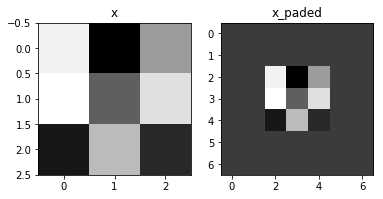

In [5]:
np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_paded = zero_pad(x,2)
#查看信息
print ("x.shape =", x.shape)
print ("x_paded.shape =", x_paded.shape)
print ("x[1, 1] =", x[1, 1])
print ("x_paded[1, 1] =", x_paded[1, 1])

#绘制图
fig , axarr = plt.subplots(1,2)  #一行两列
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_paded')
axarr[1].imshow(x_paded[0,:,:,0])
